In [1]:
import numpy as np
import matplotlib.pyplot as plt

import io 
import pandas as pd  
import pyreadr

from load_data import *
from pred_score import *

from Filter_FS import *
from Wrapper_FS import *
from hybrid_FS import *
from overlap_genes import *

np.random.seed(1)
random.sedd(1)

# Baseline with preselected genes for AE3

In [2]:
#Load preprocess data
AE3 = np.array(pd.read_csv ('../data/processed_data/AE3csv_process.csv'))
y = np.array(AE3[:,-1],dtype=int)
AE3 = AE3[:,0:-1]

In [7]:
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE3,y,4)

In [8]:
print(AE3.shape, len(pred))
acc = model.score_
print(acc)

(333, 5380) 333
0.3905579399141631


In [9]:
print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

sensitivity, specificity, precision, NPV, FDR, FNR =  (0.2983606557377049, 0.9955708047411104, 0.3905579399141631, 0.9933399726129715, 0.6094420600858369, 0.7016393442622951)


# Filter methods

# Mutual information maximizer (MIM)

[  61  118  122  163  194  203  266  305  406  493  500  584  631  636
  691  695  709  728  809  891  902  903  934 1057 1165 1197 1212 1239
 1330 1362 1375 1446 1494 1498 1499 1549 1556 1572 1606 1633 1644 1646
 1648 1665 1672 1677 1680 1687 1688 1702 1711 1716 1717 1734 1761 1762
 1771 1784 1789 1809 1816 1819 1836 1837 1842 1844 1845 1851 1854 1861
 1876 1910 1925 1950 1958 2062 2096 2157 2175 2213 2248 2265 2266 2267
 2282 2338 2380 2396 2402 2427 2432 2441 2523 2525 2538 2571 2615 2707
 2711 2807 2815 2817 2887 2929 2938 2947 2965 2969 3035 3048 3121 3197
 3217 3234 3235 3244 3260 3271 3275 3280 3286 3289 3299 3330 3335 3371
 3380 3384 3394 3420 3453 3468 3516 3534 3550 3552 3563 3581 3624 3640
 3659 3671 3682 3691 3722 3790 3808 3852 3858 3891 3892 3896 3900 3902
 3944 4026 4043 4082 4121 4206 4225 4280 4330 4370 4417 4426 4428 4434
 4473 4502 4600 4620 4645 4718 4719 4762 4778 4981 5063 5078 5159 5259
 5327 5346 5347 5358 5361 5363 5364 5367] 0.8873239436619719


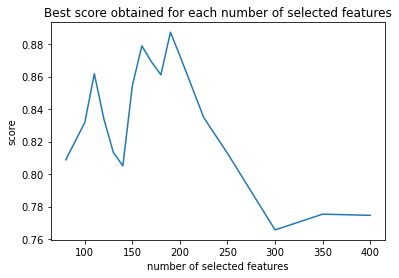

In [10]:
N = np.array([80,100,110,120,130,140,150,160,170,180,190,200,225,250,300,350,400])
best_subset, best_score = MIM(y, AE3, FamiliesClusters, compute_sensitivity,True,N, 3, plot=True)
print(best_subset, best_score)

In [11]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE3[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

190
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.8873239436619719, 0.975735294117647, 0.45, 0.9974229571566627, 0.55, 0.11267605633802817)


[ 118  194  203  406  493  500  636  695  709  728  809  903 1165 1197
 1239 1330 1375 1446 1549 1606 1644 1646 1648 1672 1677 1687 1702 1717
 1734 1762 1789 1809 1816 1836 1844 1851 1854 1861 1876 1910 1925 2096
 2248 2267 2380 2396 2402 2427 2441 2538 2711 2815 2817 2969 3035 3048
 3234 3271 3280 3299 3330 3371 3380 3453 3516 3550 3552 3563 3581 3624
 3640 3659 3722 3790 3891 4121 4280 4330 4417 4426 4434 4473 4718 5078
 5259 5346 5347 5361 5363] 0.8957345971563981


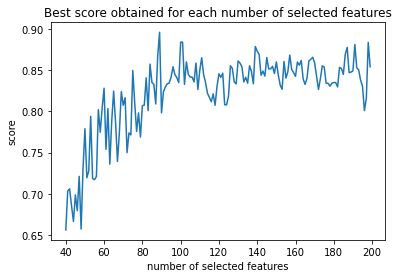

In [10]:
N = np.arange(40,200,1)
best_subset, best_score = MIM(y, AE3, FamiliesClusters, compute_sensitivity,True,N, 3, plot=True)
print(best_subset, best_score)

In [11]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE3[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

89
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.8957345971563981, 0.9631209232313096, 0.391304347826087, 0.9971428571428571, 0.6086956521739131, 0.10426540284360189)


# Mutual information feature selection (MIFS)


[  17   20   41   43   56   57   75   82   90  100  116  124  156  160
  163  165  167  169  171  172  188  207  209  228  247  251  261  265
  272  277  279  281  294  303  305  307  315  322  338  343  344  357
  364  380  382  386  403  407  409  411  423  425  453  461  467  468
  472  473  482  484  495  498  509  510  514  515  519  521  531  539
  541  546  554  573  578  580  587  603  605  620  637  647  675  684
  691  720  728  735  740  741  746  748  749  754  769  783  797  800
  802  807  819  825  836  837  849  857  863  869  876  880  904  906
  910  911  921  934  939  943  959  961  972  975 1016 1024 1033 1048
 1077 1084 1112 1117 1125 1138 1141 1147 1162 1165 1166 1169 1174 1176
 1188 1189 1191 1199 1204 1222 1229 1240 1244 1254 1257 1264 1272 1274
 1277 1281 1284 1316 1330 1335 1351 1354 1358 1360 1375 1376 1392 1393
 1397 1398 1401 1405 1419 1442 1443 1446 1466 1468 1470 1471 1472 1489
 1490 1501 1510 1516 1523 1524 1525 1531 1535 1539 1541 1545 1547 1552
 1559 

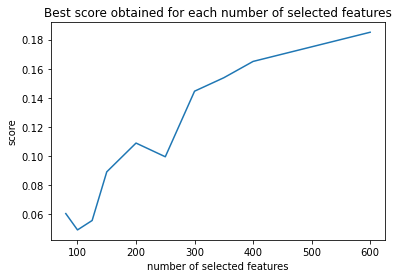

In [4]:
N = np.array([80,100,125,150,200,250,300,350,400,600])
best_subset, best_score = MIFS(y, AE3, FamiliesClusters, compute_precision,True,N, 1, plot=True)
print(best_subset, best_score)

In [5]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE3[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

600
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.43636363636363634, 0.9795470675527453, 0.18508997429305912, 0.993911620294599, 0.8149100257069408, 0.5636363636363636)


# Joint Mutual Information (JMI)

[  21   32   54   66  155  195  197  216  263  352  355  436  448  529
  596  601  617  618  626  629  638  644  645  658  662  667  668  674
  679  683  692  699  700  709  711  714  715  726  730  733  734  750
  763  765  774  778  798  815  818  830  856  877  885  903  924  926
  928  933  952  953  989  992  995  998 1001 1002 1009 1017 1032 1047
 1064 1074 1076 1079 1086 1087 1088 1090 1092 1095 1103 1120 1129 1135
 1154 1178 1198 1205 1214 1217 1227 1228 1249 1262 1283 1286 1294 1297
 1300 1314 1350 1356 1367 1369 1379 1388 1395 1406 1411 1422 1448 1469
 1497 1509 1517 1518 1521 1522 1527 1543 1548 1555 1571 1576 1580 1586
 1603 1613 1615 1619 1656 1659 1664 1701 1702 1706 1708 1727 1739 1748
 1751 1755 1761 1765 1768 1798 1814 1827 1829 1831 1845 1847 1862 1863
 1878 1905 1926 1941 1955 1961 1964 1969 1972 1978 1980 1985 1999 2008
 2009 2031 2044 2045 2046 2049 2055 2058 2059 2062 2069 2070 2073 2080
 2092 2099 2107 2108 2119 2135 2144 2145 2162 2174 2176 2180 2181 2182
 2183 

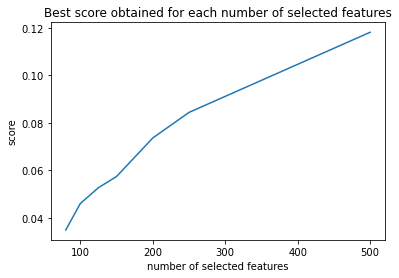

In [5]:
N = np.array([80,100,125,150,200,250,500])
best_subset, best_score = JMI(y, AE3, FamiliesClusters, compute_precision ,True, N, plot=True)
print(best_subset, best_score)

In [6]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE3[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

500
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.34306569343065696, 0.9754081132207665, 0.11809045226130653, 0.993576934056523, 0.8819095477386935, 0.656934306569343)


# Fisher's score

[   0   16   70   71   73   88   95   98  107  110  119  163  174  193
  202  231  236  242  246  250  263  267  268  278  284  300  315  344
  351  357  359  367  376  392  407  434  438  443  450  453  469  482
  487  498  508  510  538  573  579  595  598  621  640  652  662  664
  671  672  681  693  709  713  720  721  724  783  787  796  801  804
  842  857  861  862  863  883  900  911  918  942  948  954  955  957
  967  968  977  979 1002 1005 1018 1033 1049 1058 1077 1082 1085 1089
 1107 1111 1115 1118 1128 1129 1158 1182 1183 1186 1188 1193 1204 1210
 1212 1220 1242 1249 1250 1263 1271 1272 1281 1282 1287 1300 1308 1321
 1327 1351 1352 1358 1373 1385 1389 1408 1414 1422 1425 1426 1435 1463
 1506 1524 1527 1537 1539 1554 1557 1563 1570 1591 1593 1594 1608 1628
 1630 1635 1637 1646 1652 1654 1667 1706 1714 1728 1736 1737 1742 1746
 1757 1763 1774 1788 1803 1811 1817 1821 1823 1831 1840 1852 1862 1864
 1865 1880 1888 1894 1895 1922 1926 1933 1938 1957 1972 1985 1992 2007
 2009 

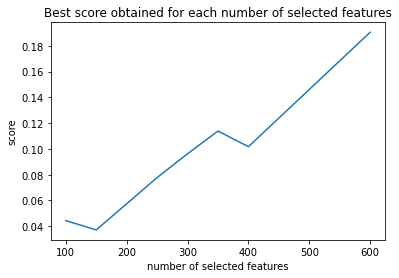

In [3]:
N = np.array([100,150,250,300,350,400,600])
best_subset, best_score = fishers_score(y, AE3, FamiliesClusters,compute_precision,True,N, plot=True)
print(best_subset, best_score)

In [4]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE3[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

600
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.4301675977653631, 0.9800840489676594, 0.1905940594059406, 0.993701370878103, 0.8094059405940595, 0.5698324022346368)


# Laplacian score

[   2    5    6   11   16   18   19   20   22   50   59   60   82   86
   90   99  100  105  113  123  127  150  153  165  172  175  187  188
  204  226  234  243  264  283  295  307  311  312  317  326  347  359
  362  376  405  409  427  442  454  458  459  461  485  488  493  507
  524  529  538  539  544  548  554  562  563  585  597  602  609  611
  616  631  636  640  641  647  653  668  676  679  686  713  727  734
  736  745  752  753  760  764  770  780  825  827  851  853  855  857
  860  873  890  891  893  901  903  920  942  945  964  965  967  973
  979  990  995 1004 1011 1012 1025 1026 1039 1040 1052 1057 1063 1065
 1077 1085 1091 1110 1115 1121 1122 1123 1132 1133 1139 1152 1156 1164
 1170 1172 1182 1188 1191 1201 1207 1213 1222 1239 1260 1270 1273 1274
 1286 1292 1299 1302 1315 1316 1319 1338 1346 1361 1363 1375 1376 1377
 1389 1391 1392 1440 1447 1451 1456 1461 1469 1470 1491 1496 1503 1510
 1514 1520 1537 1542 1545 1551 1552 1559 1582 1585 1590 1630 1645 1653
 1658 

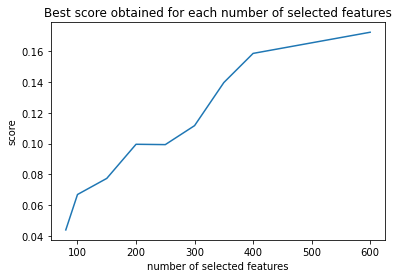

In [5]:
N = np.array([80,100,150,200,250,300,350,400,600])
best_subset, best_score = laplacian_score(y, AE3, FamiliesClusters,compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [6]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE3[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

600
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.3743016759776536, 0.9823957137389974, 0.17223650385604114, 0.9938056523422377, 0.8277634961439588, 0.6256983240223464)


# ReliefF algorithm

[  23   55   59   66   80   92  104  121  122  127  140  162  170  172
  187  199  203  204  221  225  226  240  245  246  249  253  255  256
  259  305  314  346  351  364  372  380  385  403  424  429  437  439
  450  465  511  517  527  531  546  548  549  550  559  567  568  580
  587  591  592  599  601  604  613  618  632  641  657  664  685  698
  710  723  735  750  777  788  790  801  804  807  814  832  864  882
  891  902  930  934  964  967  978  979 1006 1022 1025 1032 1047 1072
 1075 1079 1096 1098 1101 1113 1121 1133 1135 1142 1160 1171 1179 1188
 1192 1202 1223 1226 1234 1235 1240 1275 1290 1301 1309 1315 1336 1341
 1346 1350 1358 1365 1367 1376 1441 1447 1467 1474 1487 1519 1527 1529
 1538 1549 1556 1564 1572 1591 1599 1616 1620 1623 1627 1633 1639 1644
 1653 1672 1691 1737 1744 1775 1778 1819 1836 1850 1870 1901 1912 1922
 1927 1929 1939 1940 1947 1958 1961 1973 1974 1981 1993 1998 2001 2009
 2024 2034 2044 2051 2056 2066 2077 2091 2101 2111 2120 2134 2141 2159
 2169 

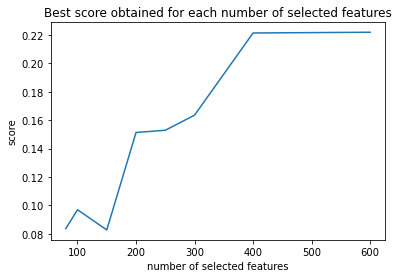

In [7]:
N = np.array([80,100,150,200,250,300,400,600])
best_subset, best_score = reliefF(y, AE3, FamiliesClusters,compute_precision,True, N, 5, plot=True)
print(best_subset, best_score)

In [8]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE3[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

600
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.4564102564102564, 0.98202454341188, 0.22194513715710723, 0.9938196023555478, 0.7780548628428927, 0.5435897435897435)


# Fast Correlation Based Filter algorithm (FCBF)

[  29   34   62   64   65   90   98  105  108  115  119  133  135  157
  173  184  185  196  199  204  208  209  227  243  253  257  267  270
  276  283  292  303  310  324  337  339  345  355  379  396  404  406
  411  414  415  424  429  431  449  451  452  456  470  471  490  497
  499  503  504  512  537  551  572  586  588  590  600  609  615  616
  640  641  649  663  665  679  682  683  697  701  703  712  725  740
  744  745  747  750  788  797  806  819  828  833  845  847  857  874
  882  889  891  895  911  922  923  930  941  943  945  959  970  985
  993  994  997 1007 1019 1022 1025 1028 1035 1037 1044 1051 1079 1082
 1088 1094 1097 1101 1107 1108 1126 1144 1164 1166 1167 1171 1179 1181
 1199 1208 1220 1229 1238 1261 1265 1276 1282 1283 1298 1301 1334 1346
 1350 1351 1352 1357 1360 1362 1372 1373 1404 1410 1414 1425 1430 1433
 1438 1439 1460 1463 1467 1468 1481 1483 1510 1518 1523 1530 1537 1538
 1540 1543 1545 1553 1581 1586 1590 1595 1598 1611 1622 1637 1648 1662
 1681 

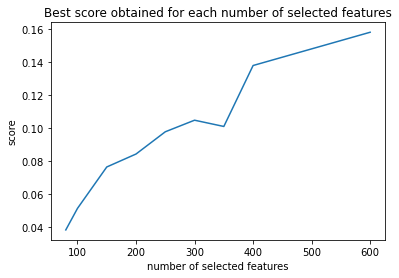

In [9]:
N = np.array([80,100,150,200,250,300,350,400,600])
best_subset, best_score = FCBF(y, AE3, FamiliesClusters,compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [10]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE3[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

600
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.3815028901734104, 0.9769154883262084, 0.15827338129496402, 0.9928480716529644, 0.841726618705036, 0.6184971098265896)


# Hilbert Schmidt Independence Criterion Lasso (HSIC Lasso)

Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


C:\Users\alexi\anaconda3\lib\site-packages\pyHSICLasso\api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 333. Number of blocks 16.65 will be approximated to 16.
  warnings.warn(msg, RuntimeWarning)


Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


C:\Users\alexi\anaconda3\lib\site-packages\pyHSICLasso\nlars.py:77: RuntimeWarning: divide by zero encountered in true_divide
  gamma1 = (C - c[I]) / (XtXw[A[0]] - XtXw[I])


Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
[   2    8   38   45   94   95  103  110  113  120  122  141  143  164
  166  175  186  191  198  201  203  208  209  217  219  234  248  281
  362  365  368  373  378  391  401  406  407  411  417  420  439  446
  447  479  481  496  515  526  535  540  543  544  545  554  556  569
  574  575  582  586  590  594  605  607  623  631  637  644  649  651
  661  675  677  682  689  691  692  693  703  709  712  727  747  766
  772  775  783  785  788  790  801  814  822  833  846  849  851  853
  865  868  882  884  887  893  897  906  915  929  934  957  973  987
 1008 1015 1027 1042 1090 1099 1143 1148 1156 1170 1172 1175 1194 1195
 1197 1202 1217 1223 1228 1239 1245 1257 1272 1279 1292 1294 1304 1305
 1310 1319 1337 1339 1377 1378 1390 1404 1407 1411 1412 1423 1430 1441
 14

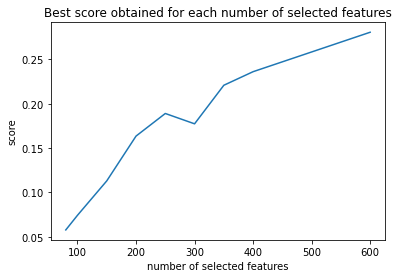

In [11]:
N = np.array([80,100,150,200,250,300,350,400,600])
best_subset, best_score = HsicLasso(y, AE3, FamiliesClusters,compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [12]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE3[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

600
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.5, 0.9824376536705304, 0.2805755395683453, 0.9930765134031599, 0.7194244604316546, 0.5)


# Wrapper methods

# Stochastic optimization of features selection 

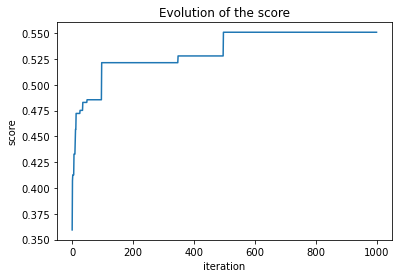

0.5508474576271186


In [14]:
best_subset, best_score  = hillclimbing(y, AE3, FamiliesClusters, compute_sensitivity,True, 1000, 0.1, True)
print(best_score)

In [15]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_sensitivity,True)
pred = model.fit_predict(AE3[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

2698
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.5508474576271186, 0.9859089501393621, 0.3225806451612903, 0.9944811787369189, 0.6774193548387096, 0.4491525423728814)


# Stimulated annealing

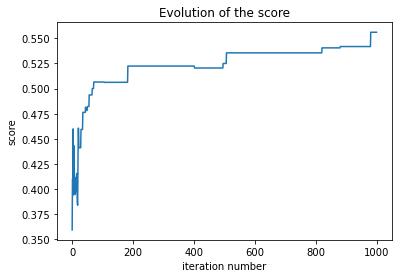

0.5560747663551402


In [16]:
best_subset, best_score  = stimulated_annealing(y, AE3, FamiliesClusters, compute_sensitivity,True, 1000, 0.1, 1, True)
print(best_score)

In [17]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_sensitivity,True)
pred = model.fit_predict(AE3[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

2678
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.5560747663551402, 0.9854923956423255, 0.30670103092783507, 0.9948279616724739, 0.6932989690721649, 0.4439252336448598)


# Genetic feature selection algorithm

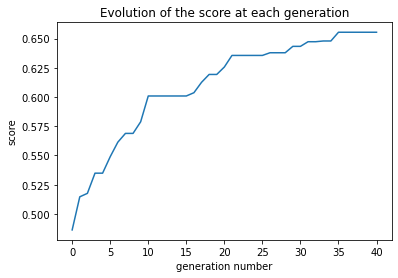

0.655448342695321


In [18]:
best_subset, best_score  = genetic_fs(y,AE3,FamiliesClusters,compute_sensitivity,True, 300, 0.5, 0.2, 40, 3, True)
print(best_score)

In [19]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_sensitivity,True)
pred = model.fit_predict(AE3[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

1155
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.616504854368932, 0.9789029535864979, 0.3009478672985782, 0.9942616401539914, 0.6990521327014217, 0.38349514563106796)


# Hybrid methods

# Mutual information and stimulated annealing

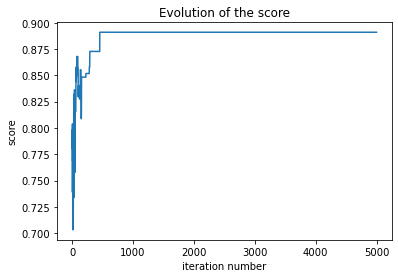

[ 112  122  203  204  305  406  420  452  490  493  500  516  526  549
  650  659  691  709  728  746  786  794  809  896  903  930  998 1046
 1055 1057 1058 1075 1092 1103 1108 1155 1168 1190 1212 1315 1375 1425
 1433 1446 1494 1499 1549 1553 1576 1588 1619 1633 1642 1644 1646 1653
 1654 1660 1672 1676 1680 1687 1688 1700 1711 1716 1734 1735 1761 1765
 1784 1789 1806 1836 1837 1842 1845 1861 1869 1872 1884 1910 1924 1950
 1951 1958 1974 2008 2051 2054 2077 2096 2102 2157 2178 2200 2252 2266
 2267 2282 2291 2354 2380 2396 2427 2441 2450 2455 2478 2523 2524 2525
 2538 2554 2571 2587 2601 2605 2610 2706 2707 2711 2764 2769 2770 2789
 2791 2797 2807 2815 2816 2887 2901 2929 2931 2965 2969 3046 3048 3121
 3129 3137 3197 3199 3208 3217 3234 3241 3260 3275 3288 3289 3309 3324
 3330 3333 3380 3387 3420 3427 3447 3516 3518 3533 3550 3563 3565 3575
 3583 3595 3605 3620 3624 3630 3631 3640 3658 3682 3764 3808 3831 3891
 3896 3901 3966 3967 4000 4043 4057 4093 4122 4180 4211 4287 4289 4328
 4330 

In [10]:
best_subset, best_score = MI_stimulated_annealing(y,AE3, FamiliesClusters, compute_sensitivity,True, np.array([450]), 3, 5000, 0.05, 1, True)
print(best_subset, best_score)

In [11]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_sensitivity,True)
pred = model.fit_predict(AE3[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

238
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.8909090909090909, 0.9678412589804994, 0.4100418410041841, 0.9971801198449066, 0.5899581589958159, 0.10909090909090909)


# Mutual information and genetic feature selection

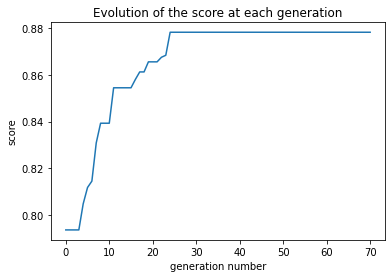

[  28   73   79   92   99  101  117  122  123  134  162  181  187  194
  204  252  253  280  296  343  354  402  406  411  429  439  452  491
  549  589  659  670  671  691  695  728  809  832  891  893  902  930
  973  995 1003 1043 1058 1062 1099 1108 1165 1180 1190 1198 1212 1239
 1251 1271 1297 1300 1330 1375 1401 1425 1433 1446 1447 1456 1494 1503
 1514 1553 1556 1572 1574 1622 1634 1639 1642 1644 1646 1647 1657 1672
 1691 1700 1702 1711 1716 1725 1734 1755 1761 1762 1766 1771 1789 1809
 1816 1827 1836 1840 1841 1872 1884 1910 1919 1925 1950 1953 1974 1987
 2029 2045 2079 2140 2175 2238 2267 2282 2291 2297 2309 2315 2327 2330
 2396 2402 2419 2424 2427 2432 2441 2450 2466 2467 2496 2524 2573 2587
 2618 2711 2721 2733 2764 2769 2770 2777 2789 2791 2807 2814 2816 2817
 2899 2914 2919 2929 2932 2934 2938 2947 2964 2965 3001 3011 3056 3129
 3158 3197 3198 3208 3217 3222 3251 3254 3260 3262 3289 3299 3326 3330
 3334 3335 3348 3371 3384 3387 3412 3438 3447 3559 3563 3566 3569 3581
 3585 

In [12]:
best_subset_AE3, best_score = MI_genetic_fs(y,AE3, FamiliesClusters, compute_sensitivity,True, np.array([850]), 3,  300, 0.5, 0.2, 70, 3, True)
print(best_subset_AE3, best_score)

In [13]:
print(len(best_subset_AE3))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE3[:, best_subset_AE3],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

293
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.8705357142857143, 0.9733480176211454, 0.4462242562929062, 0.9967294462614188, 0.5537757437070938, 0.12946428571428573)


# Best subset = MI/GA

In [8]:
#Create .csv with names of this subset
get_best_genes_names(best_subset_AE3, '../data/processed_data/AE3genes_interest.csv', '../data/optimized_subsets/AE3genes_best.csv')